In [2]:
import warnings
warnings.filterwarnings("ignore")
# data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os 
## Visualization ## 
import matplotlib.pyplot as plt 
import seaborn as sns
# sklearn
from skimage.feature import hog
from sklearn.metrics import classification_report, confusion_matrix
# one hot enchoding
from sklearn.preprocessing import OneHotEncoder
## Image ## 
import cv2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
## Tensorflow ## 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50V2

# **LOADING DATASET**

In [3]:
df = pd.read_csv('dataset/butterflies and moths.csv')
image_loc = 'dataset/'
df['filepaths']= image_loc+df['filepaths']
df

,class id,filepaths,labels,data set
0,0,dataset/train/ADONIS/001.jpg,ADONIS,train
1,0,dataset/train/ADONIS/002.jpg,ADONIS,train
2,0,dataset/train/ADONIS/003.jpg,ADONIS,train
3,0,dataset/train/ADONIS/004.jpg,ADONIS,train
4,0,dataset/train/ADONIS/005.jpg,ADONIS,train
...,...,...,...,...
13589,99,dataset/valid/ZEBRA LONG WING/1.jpg,ZEBRA LONG WING,valid
13590,99,dataset/valid/ZEBRA LONG WING/2.jpg,ZEBRA LONG WING,valid
13591,99,dataset/valid/ZEBRA LONG WING/3.jpg,ZEBRA LONG WING,valid
13592,99,dataset/valid/ZEBRA LONG WING/4.jpg,ZEBRA LONG WING,valid


# **ONE HOT ENCODING**

In [4]:
categories = df[['labels']]
encoder = OneHotEncoder(sparse=False)
one_hot_encoded = encoder.fit_transform(categories)

df1 = pd.concat([df, pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['labels']))], axis=1)
print(one_hot_encoded.shape)
df1

(13594, 100)


,class id,filepaths,labels,data set,labels_ADONIS,labels_AFRICAN GIANT SWALLOWTAIL,labels_AMERICAN SNOOT,labels_AN 88,labels_APPOLLO,labels_ARCIGERA FLOWER MOTH,...,labels_SOUTHERN DOGFACE,labels_STRAITED QUEEN,labels_TROPICAL LEAFWING,labels_TWO BARRED FLASHER,labels_ULYSES,labels_VICEROY,labels_WHITE LINED SPHINX MOTH,labels_WOOD SATYR,labels_YELLOW SWALLOW TAIL,labels_ZEBRA LONG WING
0,0,dataset/train/ADONIS/001.jpg,ADONIS,train,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,dataset/train/ADONIS/002.jpg,ADONIS,train,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,dataset/train/ADONIS/003.jpg,ADONIS,train,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,dataset/train/ADONIS/004.jpg,ADONIS,train,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,dataset/train/ADONIS/005.jpg,ADONIS,train,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13589,99,dataset/valid/ZEBRA LONG WING/1.jpg,ZEBRA LONG WING,valid,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13590,99,dataset/valid/ZEBRA LONG WING/2.jpg,ZEBRA LONG WING,valid,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13591,99,dataset/valid/ZEBRA LONG WING/3.jpg,ZEBRA LONG WING,valid,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13592,99,dataset/valid/ZEBRA LONG WING/4.jpg,ZEBRA LONG WING,valid,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
df2 = df1.drop(columns=(['class id','filepaths','labels','data set']))
lables = df2
lables

,labels_ADONIS,labels_AFRICAN GIANT SWALLOWTAIL,labels_AMERICAN SNOOT,labels_AN 88,labels_APPOLLO,labels_ARCIGERA FLOWER MOTH,labels_ATALA,labels_ATLAS MOTH,labels_BANDED ORANGE HELICONIAN,labels_BANDED PEACOCK,...,labels_SOUTHERN DOGFACE,labels_STRAITED QUEEN,labels_TROPICAL LEAFWING,labels_TWO BARRED FLASHER,labels_ULYSES,labels_VICEROY,labels_WHITE LINED SPHINX MOTH,labels_WOOD SATYR,labels_YELLOW SWALLOW TAIL,labels_ZEBRA LONG WING
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
# printint the shape of the df
print("Dataset shape ",df1.shape)
print("Columns :",df1.columns)

Dataset shape  (13594, 104)
Columns : Index(['class id', 'filepaths', 'labels', 'data set', 'labels_ADONIS',
       'labels_AFRICAN GIANT SWALLOWTAIL', 'labels_AMERICAN SNOOT',
       'labels_AN 88', 'labels_APPOLLO', 'labels_ARCIGERA FLOWER MOTH',
       ...
       'labels_SOUTHERN DOGFACE', 'labels_STRAITED QUEEN',
       'labels_TROPICAL LEAFWING', 'labels_TWO BARRED FLASHER',
       'labels_ULYSES', 'labels_VICEROY', 'labels_WHITE LINED SPHINX MOTH',
       'labels_WOOD SATYR', 'labels_YELLOW SWALLOW TAIL',
       'labels_ZEBRA LONG WING'],
      dtype='object', length=104)


In [9]:
training_dataset = df1.loc[df['data set']=='train']
validation_dataset = df1.loc[df['data set']=='valid']
test_dataset = df1.loc[df['data set']=='test']


In [10]:
print("Size of the training daataset",training_dataset.shape)
print("Size of the validation dataset:",validation_dataset.shape)
print("Size of the test data: ",test_dataset.shape)

Size of the training daataset (12594, 104)
Size of the validation dataset: (500, 104)
Size of the test data:  (500, 104)


# **VISUALISATION OF DATASET**

In [11]:
lable_count = df1['labels'].value_counts()
print(type(lable_count))
lable_count = lable_count[:10] # taking only top 10 species of butterfly with hightes number of datapoints.
lable_count.size
print(lable_count)


<class 'pandas.core.series.Series'>
labels
MOURNING CLOAK             197
GREEN HAIRSTREAK           186
BROWN ARGUS                179
BROOKES BIRDWING           175
SLEEPY ORANGE              162
CHALK HILL BLUE            159
HUMMING BIRD HAWK MOTH     153
ATALA                      153
WHITE LINED SPHINX MOTH    153
BROWN SIPROETA             150
Name: count, dtype: int64


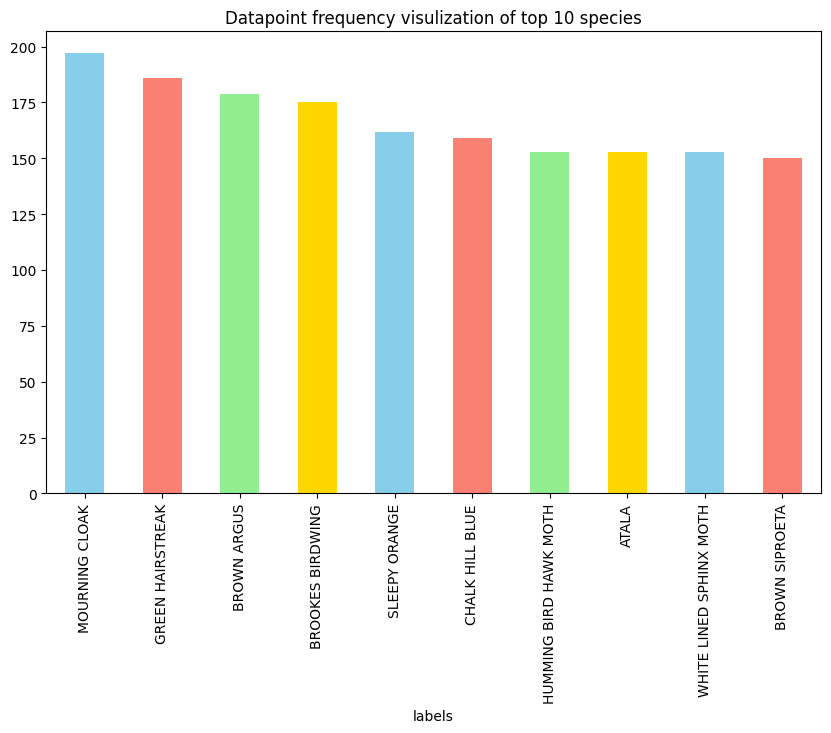

In [12]:
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = lable_count.plot.bar(color=colors)
plt.title("Datapoint frequency visulization of top 10 species") 
plt.show()

In [13]:
def show_image(image_path, cols, title):
    fig,ax = plt.subplots(figsize=(25,6),nrows=1, ncols=cols)
    for i in range(cols):
        image = cv2.cvtColor(cv2.imread(image_path[i]),cv2.COLOR_BGR2RGB)
        ax[i].imshow(image)
        ax[i].set_title(title)
    plt.show()

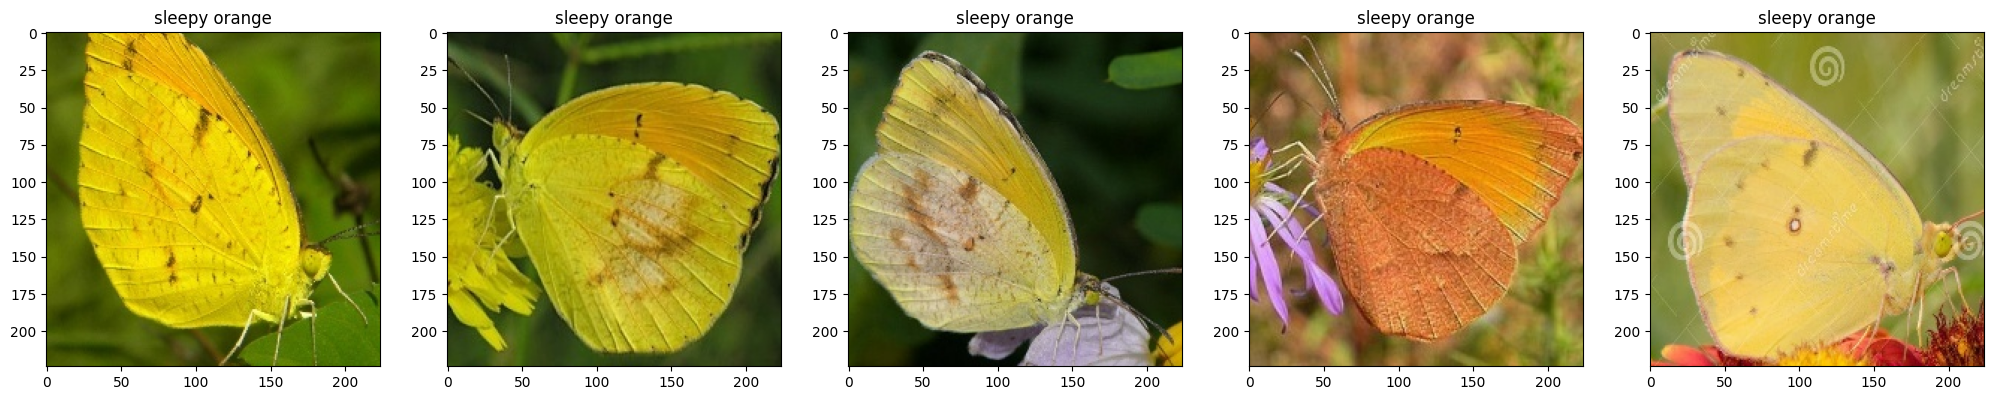

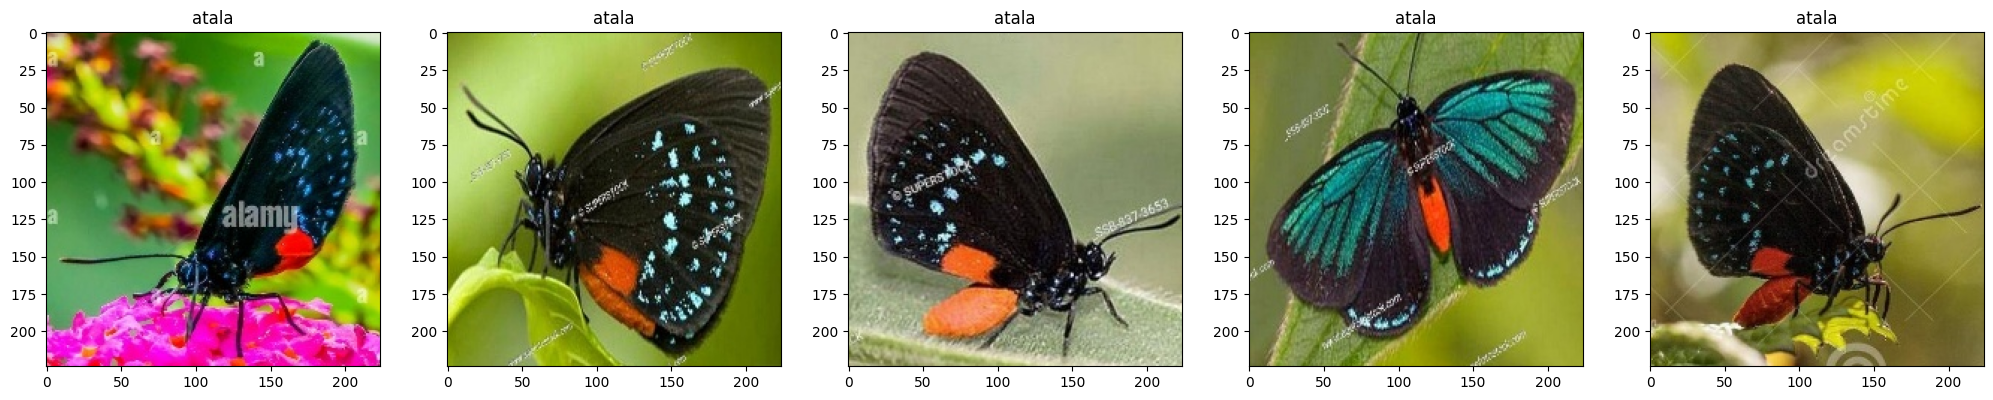

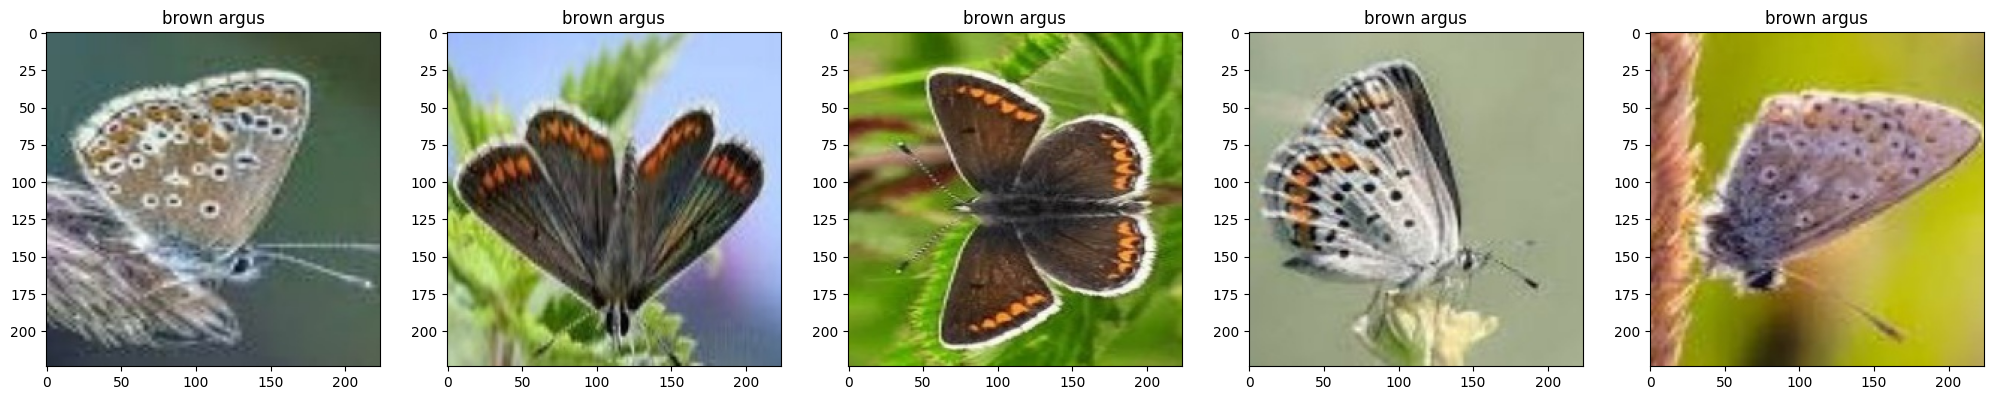

In [14]:
sleepy_orange = df1.loc[df['labels']=='SLEEPY ORANGE']['filepaths'].iloc[:5].tolist()
sleepy_orange_array = np.array(sleepy_orange)
show_image(sleepy_orange_array, 5 , 'sleepy orange')

atala = df1.loc[df['labels']=='ATALA']['filepaths'].iloc[:5].tolist()
atala_array = np.array(atala)
show_image(atala_array, 5 , 'atala')

brown_argus = df1.loc[df['labels']=='BROWN ARGUS']['filepaths'].iloc[:5].tolist()
brown_argus_array = np.array(brown_argus)
show_image(brown_argus_array, 5 , 'brown argus')


In [15]:
sleepy_orange

['dataset/train/SLEEPY ORANGE/001.jpg',
 'dataset/train/SLEEPY ORANGE/002.jpg',
 'dataset/train/SLEEPY ORANGE/003.jpg',
 'dataset/train/SLEEPY ORANGE/004.jpg',
 'dataset/train/SLEEPY ORANGE/005.jpg']

# **feature Extraction using HOG and then classication using svc kernal**

In [16]:

filepath = training_dataset['filepaths'].iloc[:1392]
label = training_dataset['class id'].iloc[:1392]

x_train = pd.DataFrame({'filepaths': filepath, 'class id': label})
# Print first few rows for verification
print(x_train)
# test dataset
f3 = test_dataset['filepaths'].iloc[:55]
l3 = test_dataset['class id'].iloc[:55]
x_test = pd.DataFrame({'filepaths':f3,'class id':l3})
x_test.reset_index(drop=True, inplace=True)


                                    filepaths  class id
0                dataset/train/ADONIS/001.jpg         0
1                dataset/train/ADONIS/002.jpg         0
2                dataset/train/ADONIS/003.jpg         0
3                dataset/train/ADONIS/004.jpg         0
4                dataset/train/ADONIS/005.jpg         0
...                                       ...       ...
1387  dataset/train/BANDED TIGER MOTH/132.jpg        10
1388  dataset/train/BANDED TIGER MOTH/133.jpg        10
1389  dataset/train/BANDED TIGER MOTH/134.jpg        10
1390  dataset/train/BANDED TIGER MOTH/135.jpg        10
1391  dataset/train/BANDED TIGER MOTH/136.jpg        10

[1392 rows x 2 columns]


In [17]:
print("Training dataset shape",x_train.shape)
print("test dataset shape",x_test.shape)


Training dataset shape (1392, 2)
test dataset shape (55, 2)


In [20]:
# hog on 4*4 cell
def Extract_hog_features(image):
    features, hog_image = hog(image, pixels_per_cell=(16, 16), cells_per_block=(4, 4), visualize=True)
    
    return features

Train_features = []
Train_labels = []

for i in range(x_train.shape[0]):
    image = cv2.cvtColor(cv2.imread(x_train['filepaths'][i]),cv2.COLOR_BGR2RGB)
    label = x_train['class id'][i]

    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculating  HOG features
    features = Extract_hog_features(image)

    # Checking if there are any HOG features before # Get the label corresponding to the current image appending
    if len(features) > 0:
        Train_features.append(features)
        # Appending the corresponding label for each descriptor
        Train_labels.append(label)

if Train_features:
    Train_features = np.vstack(Train_features)
    Train_labels = np.array(Train_labels)


In [21]:
# generating hog features and labs for testing data
tst_features = []
tst_lables=[]
for i in range(x_test.shape[0]):
    img = cv2.cvtColor(cv2.imread(x_test['filepaths'][i]),cv2.COLOR_BGR2RGB)
    label = x_test['class id'][i]
    if len(img.shape)==3 and img.shape[2]==3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    features = Extract_hog_features(img)
    if len(features)>0:
        tst_features.append(features)
        tst_lables.append(label)
if tst_features:
    tst_features=np.vstack(tst_features)
    tst_lables = np.array(tst_lables)

In [28]:
# hog on 2*2 cell
def extract_hog_features(image):
    features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    
    return features

train_features = []
train_labels = []

for i in range(x_train.shape[0]):
    image = cv2.cvtColor(cv2.imread(x_train['filepaths'][i]),cv2.COLOR_BGR2RGB)
    label = x_train['class id'][i]

    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculating  HOG features
    features = extract_hog_features(image)

    # Checking if there are any HOG features before # Get the label corresponding to the current image appending
    if len(features) > 0:
        train_features.append(features)
        # Appending the corresponding label for each descriptor
        train_labels.append(label)

if train_features:
    train_features = np.vstack(train_features)
    train_labels = np.array(train_labels)


In [29]:
# generating hog features and labs for testing data
test_features = []
test_lables=[]
for i in range(x_test.shape[0]):
    img = cv2.cvtColor(cv2.imread(x_test['filepaths'][i]),cv2.COLOR_BGR2RGB)
    label = x_test['class id'][i]
    if len(img.shape)==3 and img.shape[2]==3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    features = extract_hog_features(img)
    if len(features)>0:
        test_features.append(features)
        test_lables.append(label)
if test_features:
    test_features=np.vstack(test_features)
    test_lables = np.array(test_lables)

# **SVM**

In [22]:
from sklearn import svm

clf = svm.SVC()
# on 4*4 cell features 
clf.fit(Train_features, Train_labels)
clf


SVC()

In [25]:
pred = clf.predict(tst_features)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
accuracy = accuracy_score(tst_lables,pred)
precision = precision_score(tst_lables,pred,average='weighted')
recall = recall_score(tst_lables,pred,average = 'weighted')
f1 = f1_score(tst_lables, pred,average = 'weighted')
cm = confusion_matrix(tst_lables,pred)
# Printing the metrics
print("Results using 4*4 cell")
print("Accuracy:", accuracy*100,"%")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Results using 4*4 cell
Accuracy: 85.45454545454545 %
Precision: 0.8681818181818182
Recall: 0.8545454545454545
F1 Score: 0.8544077134986225


In [30]:
from sklearn import svm

clf = svm.SVC()
# on 4*4 cell features 
clf.fit(train_features, train_labels)
clf


SVC()

In [75]:

preds = clf.predict(test_features)

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
accuracy = accuracy_score(test_lables,preds)
precision = precision_score(test_lables,preds,average='weighted')
recall = recall_score(test_lables,preds,average = 'weighted')
f1 = f1_score(test_lables, preds,average = 'weighted')
cm = confusion_matrix(test_lables,preds)
# Printing the metrics
print("Accuracy:", accuracy*100,"%")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 61.81818181818181 %
Precision: 0.7371212121212121
Recall: 0.6181818181818182
F1 Score: 0.6248584748584749


# **LOGISTIC REGRESSION**

In [80]:
# for 2*2 cell size
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(train_features, train_labels)
preds = model.predict(test_features)

accuracy = accuracy_score(test_lables,preds)
precision = precision_score(test_lables,preds,average='weighted')
recall = recall_score(test_lables,preds,average = 'weighted')
f1 = f1_score(test_lables, preds,average = 'weighted')
cm = confusion_matrix(test_lables,preds)
# Printing the metrics
print("Accuracy:", accuracy*100,"%")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 63.63636363636363 %
Precision: 0.6634199134199135
Recall: 0.6363636363636364
F1 Score: 0.6336744064016792


In [31]:
# for 4*4 cell size
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(Train_features, Train_labels)
pred = model.predict(tst_features)

accuracy = accuracy_score(tst_lables,pred)
precision = precision_score(tst_lables,pred,average='weighted')
recall = recall_score(tst_lables,pred,average = 'weighted')
f1 = f1_score(tst_lables, pred,average = 'weighted')
cm = confusion_matrix(tst_lables,pred)
# Printing the metrics
print("Accuracy:", accuracy*100,"%")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 67.27272727272727 %
Precision: 0.7007575757575758
Recall: 0.6727272727272727
F1 Score: 0.6778625414989051


# **Decision tree**

In [81]:
# for 2*2 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(train_features, train_labels)
preds = model.predict(test_features)

accuracy = accuracy_score(test_lables,preds)
precision = precision_score(test_lables,preds,average='weighted')
recall = recall_score(test_lables,preds,average = 'weighted')
f1 = f1_score(test_lables, preds,average = 'weighted')
cm = confusion_matrix(test_lables,preds)
# Printing the metrics
print("Accuracy:", accuracy*100,"%")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 18.181818181818183 %
Precision: 0.17045454545454544
Recall: 0.18181818181818182
F1 Score: 0.16979232888323798


In [33]:
# for 4*4
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(Train_features, Train_labels)
pred = model.predict(tst_features)

accuracy = accuracy_score(tst_lables,pred)
precision = precision_score(tst_lables,pred,average='weighted')
recall = recall_score(tst_lables,pred,average = 'weighted')
f1 = f1_score(tst_lables, pred,average = 'weighted')
cm = confusion_matrix(tst_lables,pred)
# Printing the metrics
print("Accuracy:", accuracy*100,"%")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 36.36363636363637 %
Precision: 0.39979338842975204
Recall: 0.36363636363636365
F1 Score: 0.35185899958627226


# **DATA AUGMENTATION / NORMALIZTAION**

In [32]:
train_dir = 'dataset/train'
val_dir = 'dataset/valid'
test_dir = 'dataset/test'
img_height,img_width=224,224
batch_size=32

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  shuffle=False,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  shuffle=False,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 12594 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


# **CREATING MODEL**

In [14]:
def create_model(model_name, verbose=False):
    
    input_tensor = Input(shape=(224, 224, 3))
    
    if model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(rate=0.5)(x)
    output = Dense(100, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
        
    return model

In [16]:
resnet_model = create_model(model_name='resnet50', verbose=False)
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# ckpt = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=0)
es = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=0)

In [18]:
result= resnet_model.fit(train_dataset,
                    epochs=5,
                    validation_data=val_dataset,
                    callbacks=[es, rlp]
                   )

Epoch 1/5
394/394 [==============================] - 367s 905ms/step - loss: 1.6217 - accuracy: 0.6409 - val_loss: 0.3472 - val_accuracy: 0.9080 - lr: 1.0000e-04
Epoch 2/5
394/394 [==============================] - 353s 896ms/step - loss: 0.3274 - accuracy: 0.9127 - val_loss: 0.2747 - val_accuracy: 0.9460 - lr: 1.0000e-04
Epoch 3/5
394/394 [==============================] - 353s 896ms/step - loss: 0.1656 - accuracy: 0.9537 - val_loss: 0.4044 - val_accuracy: 0.9240 - lr: 1.0000e-04
Epoch 4/5
394/394 [==============================] - 352s 894ms/step - loss: 0.0900 - accuracy: 0.9736 - val_loss: 0.2785 - val_accuracy: 0.9500 - lr: 1.0000e-04
Epoch 5/5
394/394 [==============================] - 353s 896ms/step - loss: 0.0875 - accuracy: 0.9767 - val_loss: 0.2978 - val_accuracy: 0.9520 - lr: 1.0000e-04


In [20]:
print('ResNet Test Data Accuracy: {0}'.format(resnet_model.evaluate(test_dataset)[1:][0]))

16/16 [==============================] - 3s 198ms/step - loss: 0.2978 - accuracy: 0.9520
ResNet Test Data Accuracy: 0.9520000219345093


In [21]:
training_accuracy_resnet      = result.history['accuracy'][-1]
training_loss_resnet          = result.history['loss'][-1]
validation_accuracy_resnet    = result.history['val_accuracy'][-1]
validation_loss_resnet        = result.history['val_loss'][-1]
print("Training Accuracy ResNet   :", training_accuracy_resnet )
print("Training Loss ResNet       :", training_loss_resnet)
print("Validation Accuracy ResNet :", validation_accuracy_resnet)
print("Validation Loss ResNet     :", validation_loss_resnet)



Training Accuracy ResNet   : 0.9767349362373352
Training Loss ResNet       : 0.08751615881919861
Validation Accuracy ResNet : 0.9520000219345093
Validation Loss ResNet     : 0.2977640926837921
